# Credit Card Fraud Detection: Machine Learning in R

The aim of this R project is to build a classifier that can detect credit card fraudulent transactions. We will use various machine learning algorithms like Decision Trees, Logistic Regression, Artificial Neural Networks and finally, Gradient Boosting Classifier to discern fraudulent transactions from non-fraudulent ones. 

For carrying out credit card fraud detection, we will make use of the [Credit Card]( https://drive.google.com/file/d/1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ/view) dataset that contains a mix of fraudulent and non-fraudulent transactions.

## 1. Importing the Dataset and Necessary Libraries

In [1]:
library(tidyverse)
library(ggplot2)
library(ranger)
library(caret)
creditcard_data <- read.csv("Credit Card Dataset.csv")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




## 2. Data Exploration

In this section, we will explore the data that is contained in the `creditcard_data` dataframe. We will display the `creditcard_data` using the `head()` and `tail()` function. We will then proceed to explore the other components of this dataframe.

In [2]:
dim(creditcard_data)
head(creditcard_data)

[1] 284807     31

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [3]:
tail(creditcard_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
284802,172785,0.1203164,0.93100513,-0.5460121,-0.7450968,1.13031398,-0.2359732,0.8127221,0.1150929,-0.2040635,...,-0.3142046,-0.8085204,0.05034266,0.102799590,-0.4358701,0.1240789,0.217939865,0.06880333,2.69,0
284803,172786,-11.8811179,10.07178497,-9.8347835,-2.0666557,-5.36447278,-2.6068373,-4.9182154,7.3053340,1.9144283,...,0.2134541,0.1118637,1.01447990,-0.509348453,1.4368069,0.2500343,0.943651172,0.82373096,0.77,0
284804,172787,-0.7327887,-0.05508049,2.0350297,-0.7385886,0.86822940,1.0584153,0.0243297,0.2948687,0.5848000,...,0.2142053,0.9243836,0.01246304,-1.016225669,-0.6066240,-0.3952551,0.068472470,-0.05352739,24.79,0
284805,172788,1.9195650,-0.30125385,-3.2496398,-0.5578281,2.63051512,3.0312601,-0.2968265,0.7084172,0.4324540,...,0.2320450,0.5782290,-0.03750086,0.640133881,0.2657455,-0.0873706,0.004454772,-0.02656083,67.88,0
284806,172788,-0.2404400,0.53048251,0.7025102,0.6897992,-0.37796113,0.6237077,-0.6861800,0.6791455,0.3920867,...,0.2652449,0.8000487,-0.16329794,0.123205244,-0.5691589,0.5466685,0.108820735,0.10453282,10.00,0
284807,172792,-0.5334125,-0.18973334,0.7033374,-0.5062712,-0.01254568,-0.6496167,1.5770063,-0.4146504,0.4861795,...,0.2610573,0.6430784,0.37677701,0.008797379,-0.4736487,-0.8182671,-0.002415309,0.01364891,217.00,0


In [4]:
# View table from Class column (0 for legit transactions, 1 for fraud)
table(creditcard_data$Class)


     0      1 
284315    492 

In [5]:
# View summary of amount
summary(creditcard_data$Amount)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.60    22.00    88.35    77.17 25691.16 

In [6]:
# View names of columns in dataset
names(creditcard_data)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [7]:
# View variance of Amount column
var(creditcard_data$Amount)

[1] 62560.07

In [8]:
# View standard deviation of Amount column
sd(creditcard_data$Amount)

[1] 250.1201

In [9]:
# Check if there are any missing values in columns
colSums(is.na(creditcard_data))

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

## 3. Initial Data Visualization

Let's first visualize the transactions over time and see if time is an important factor to be considered for fraud detection.

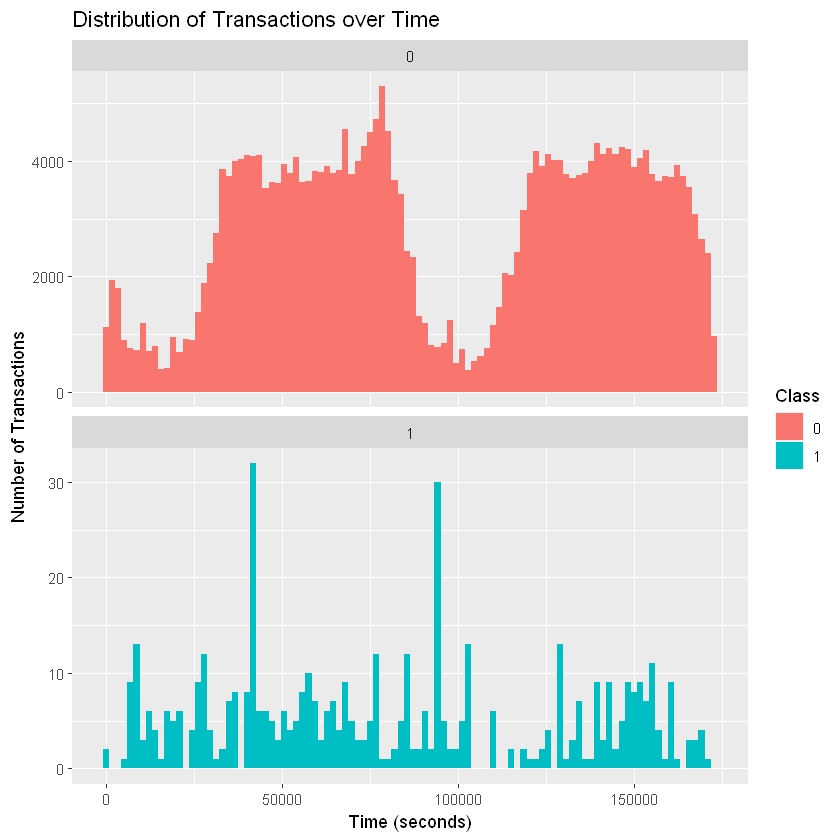

In [10]:
# Visualize the distribution of transactions over time
creditcard_data %>%
ggplot(aes(x = Time, fill = factor(Class))) +
geom_histogram(bins = 100) +
labs(x = "Time (seconds)",
     y = "Number of Transactions",
     fill = "Class",
     title = "Distribution of Transactions over Time"
    ) +
facet_wrap(~Class, ncol = 1, scales = "free_y")

The distribution appears to be pretty similar in both transactions. Since time does not contribute much in fraud detection, we can remove the `Time` column from the dataset.

## 4. Data Manipulation

Next, we will scale our data using the `scale()` function. We will apply this to the `Amount` component of `creditcard_data`. Scaling is also known as feature standardization. With the help of scaling, the data is structured according to a specified range. Therefore, there are no extreme values in our dataset that might interfere with the functioning of our model. 

In [11]:
head(creditcard_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [12]:
# Scaling Amount column using standardization and remove the Time solumn from the datasset
new_creditcard_data <- creditcard_data %>%
mutate(Amount = scale(creditcard_data$Amount),
       Time = NULL,
       Class = as.factor(creditcard_data$Class)
      )

head(new_creditcard_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<fct>
1,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.24496383,0
2,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,-0.34247394,0
3,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,1.16068389,0
4,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.14053401,0
5,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,-0.07340321,0
6,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,-0.33855582,0


## 5. Data Modeling 

After we have standardized our entire dataset, we will split our dataset into training set as well as test set with a split ratio of 0.80. This means that 80% of our data will be attributed to the `train_data` whereas 20% will be attributed to the `test_data`. We will then find the dimensions using the `dim()` function.

In [13]:
library(caTools)
set.seed(123)

# Specify split
split <- sample.split(new_creditcard_data$Class, SplitRatio = 0.8)

# Create training set
train_data <- subset(new_creditcard_data, split == TRUE)

# Create test set
test_data <- subset(new_creditcard_data, split == FALSE)

In [14]:
dim(train_data)
dim(test_data)

[1] 227846     30

[1] 56961    30

### 5.1 Fitting Logistic Regression Model

Next, we will fit our logistic regression model to find the best possible fit between our predictor and target variable. A logistic regression is used for modeling the outcome probability of a class such as pass/fail, positive/negative and in our case – fraud/not fraud.

In [15]:
# Fitting the logistic model
logistic_model <- glm(Class ~ ., train_data, family = "binomial")

summary(logistic_model)


Call:
glm(formula = Class ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6108  -0.0292  -0.0194  -0.0125   4.6021  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.651305   0.160212 -53.999  < 2e-16 ***
V1           0.072540   0.044144   1.643 0.100332    
V2           0.014818   0.059777   0.248 0.804220    
V3           0.026109   0.049776   0.525 0.599906    
V4           0.681286   0.078071   8.726  < 2e-16 ***
V5           0.087938   0.071553   1.229 0.219079    
V6          -0.148083   0.085192  -1.738 0.082170 .  
V7          -0.117344   0.068940  -1.702 0.088731 .  
V8          -0.146045   0.035667  -4.095 4.23e-05 ***
V9          -0.339828   0.117595  -2.890 0.003855 ** 
V10         -0.785462   0.098486  -7.975 1.52e-15 ***
V11          0.001492   0.085147   0.018 0.986018    
V12          0.087106   0.094869   0.918 0.358532    
V13         -0.343792   0.092381  -3.721 0.

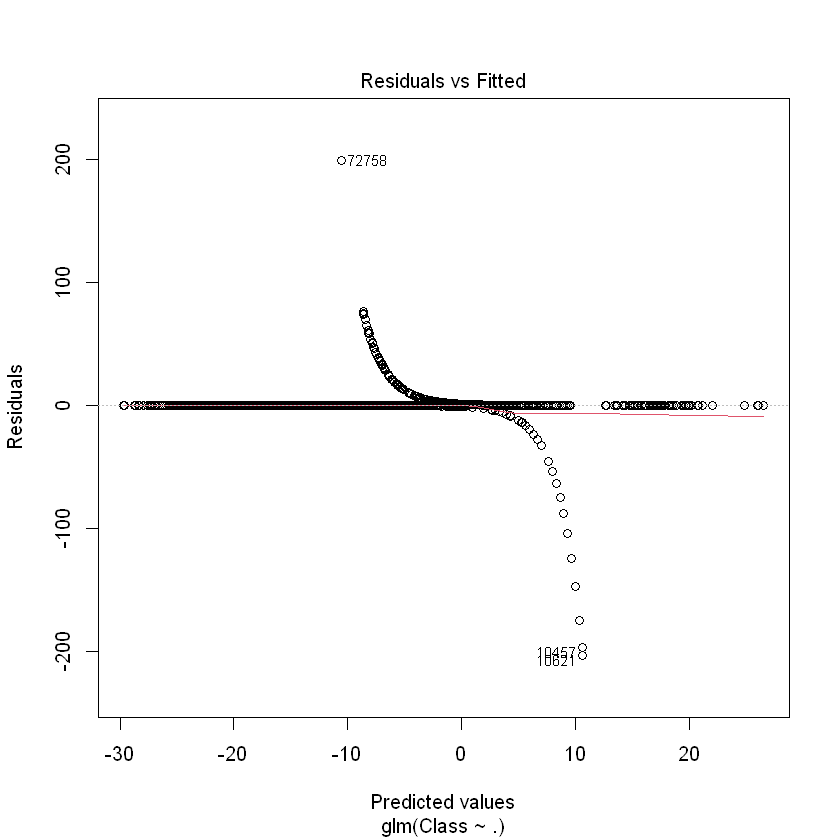

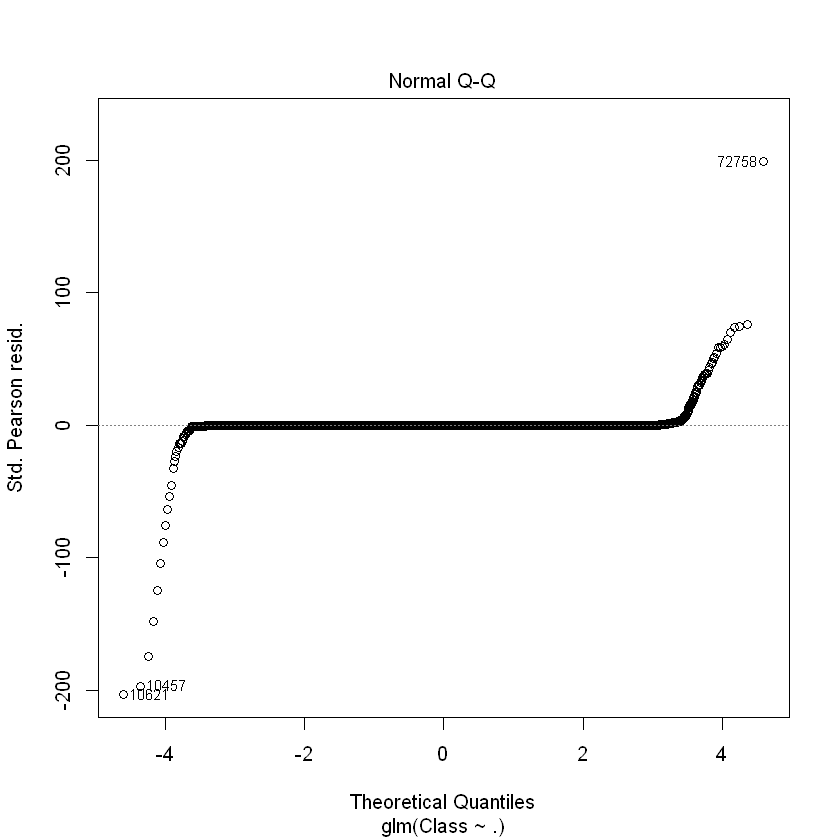

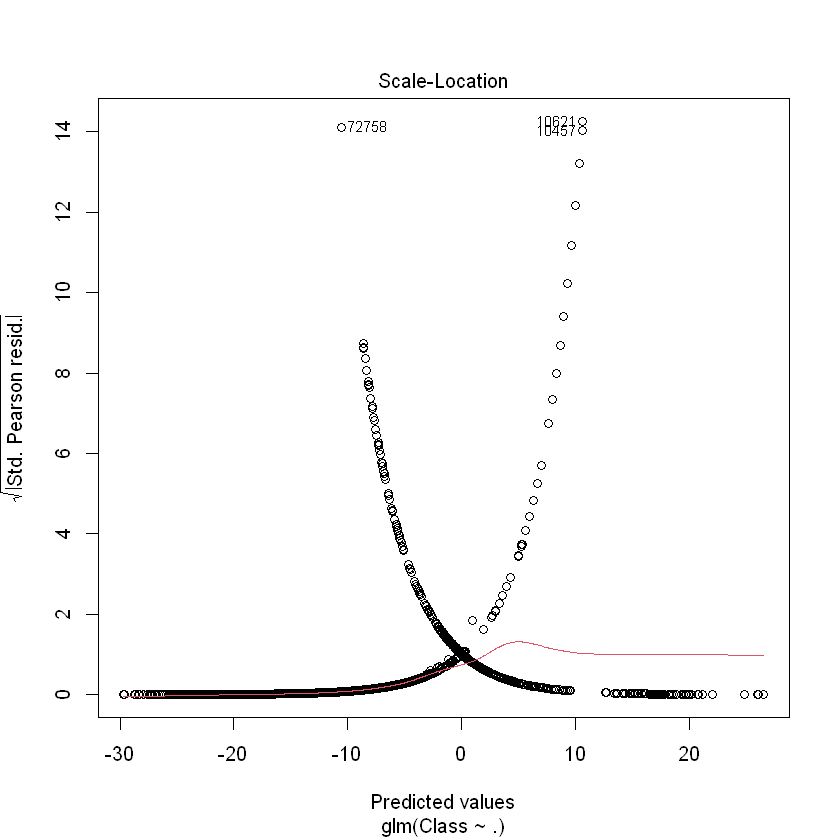

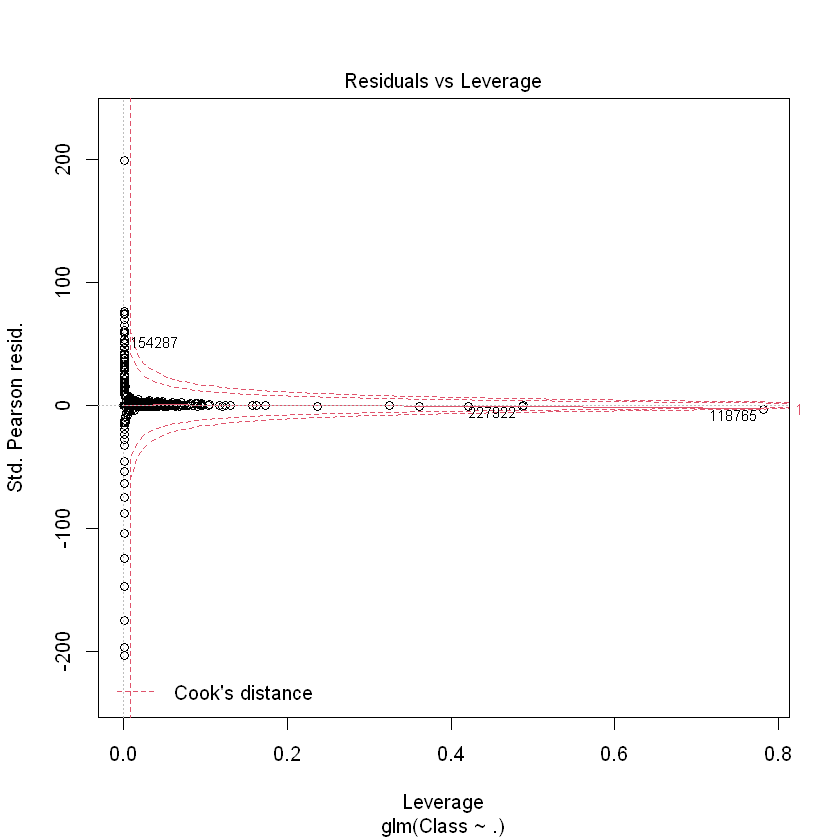

In [16]:
plot(logistic_model)

#### Model Evaluation: Plotting the ROC-AUC Curve
In order to assess the performance of our model, we will delineate the ROC (Receiver Operating Characteristic) curve. The ROC curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds. The thresholds are different probability cutoffs that separate the two classes in binary classification. It uses probability to tell us how well a model separates the classes.

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test_data$Class, predictor = logistic_predictions,     plot = TRUE, col = "blue")

Data: logistic_predictions in 56863 controls (test_data$Class 0) < 98 cases (test_data$Class 1).
Area under the curve: 0.9748

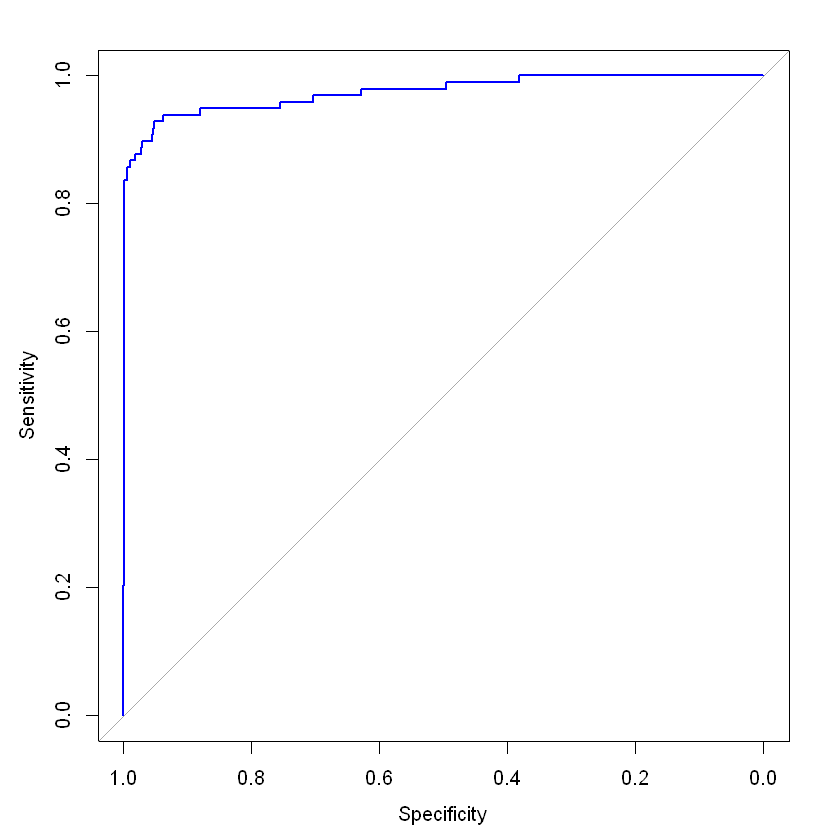

In [17]:
logistic_predictions <- predict(logistic_model, test_data, type = "response")

library(pROC)
roc(test_data$Class, logistic_predictions, plot = TRUE, col = "blue")

From the logistic regression, we got the area under the ROC curve: 0.9748. This means that there is approximately a 97% chance that the model will be able to distinguish between fraudulent and non-fraudulent transactions.

### 5.2 Decision Tree Model

In this section, we will implement a decision tree algorithm. **Decision Trees** plot the outcomes of a decision. These outcomes are a consequence through which we can conclude as to what class the object belongs to. We will now implement our decision tree model and will plot it using the `rpart.plot()` function. We will specifically use the recursive parting to plot the decision tree.

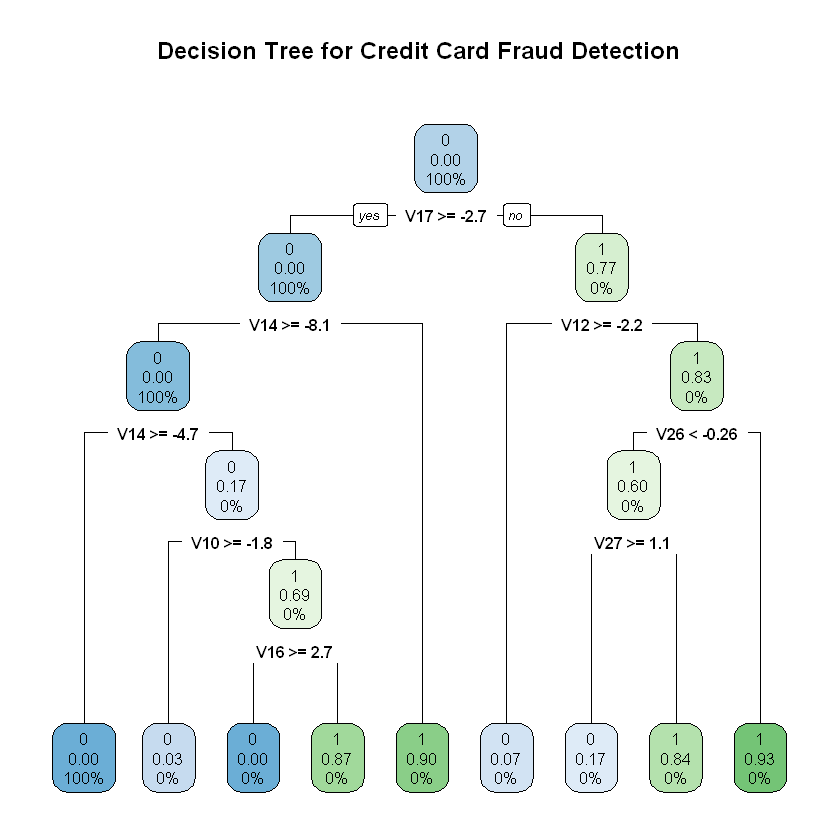

In [18]:
library(rpart)
library(rpart.plot)

# Build the decision tree model
decisiontree_model <- rpart(Class ~ ., train_data, method = "class")

# Plot the decision tree
rpart.plot(decisiontree_model, main = "Decision Tree for Credit Card Fraud Detection")

The plot above provides a visual representation of the decision-making process for classifying whether a transaction is non-fraudulent (0) or fraudulent (1). We can see that V17 is the most important variable that separates fraudulent and non-fraudulent transactions.

#### Model Evaluation: Predictions with Decision Tree Model

Next, we will use the decision tree to make predictions on our test data. To do that, we take our tree and test data to make predictions based on the derived model. Finally, we can evaluate the performance of our model by creating a confusion matrix, which provides a summary of the prediction results on the test data.

In [19]:
# Predictions on test data
decisiontree_predictions <- predict(decisiontree_model, test_data, type = "class")

# Evaluate the model
library(caret)
cm <- confusionMatrix(decisiontree_predictions, test_data$Class)
cm

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56845    21
         1    18    77
                                          
               Accuracy : 0.9993          
                 95% CI : (0.9991, 0.9995)
    No Information Rate : 0.9983          
    P-Value [Acc > NIR] : 9.766e-12       
                                          
                  Kappa : 0.7976          
                                          
 Mcnemar's Test P-Value : 0.7488          
                                          
            Sensitivity : 0.9997          
            Specificity : 0.7857          
         Pos Pred Value : 0.9996          
         Neg Pred Value : 0.8105          
             Prevalence : 0.9983          
         Detection Rate : 0.9980          
   Detection Prevalence : 0.9983          
      Balanced Accuracy : 0.8927          
                                          
       'Positive' Class : 0               
                  

We can see that with an accuracy of 99.93%, we have successfully determined if a transaction was fraudulent or non-fraudulent in the test dataset.

### 5.3 Artificial Neural Network

**Artificial Neural Networks** are a type of  machine learning algorithm that are modelled after the human nervous system. The ANN models learn patterns using historical data and are able to perform classification on the input data. We import the `neuralnet` package that would allow us to implement our ANNs. We then proceed to plot it using the `plot()` function. In the case of Artificial Neural Networks, there is a range of values between 1 and 0. We set a threshold as 0.5, that is, values above 0.5 will correspond to 1 and the rest will be 0.

In [20]:
library(neuralnet)

ANN_model <- neuralnet(Class ~ ., train_data)
plot(ANN_model)


Attaching package: 'neuralnet'


The following object is masked from 'package:dplyr':

    compute


